In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('winemag-data-130k-v2.csv')
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
dataset['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

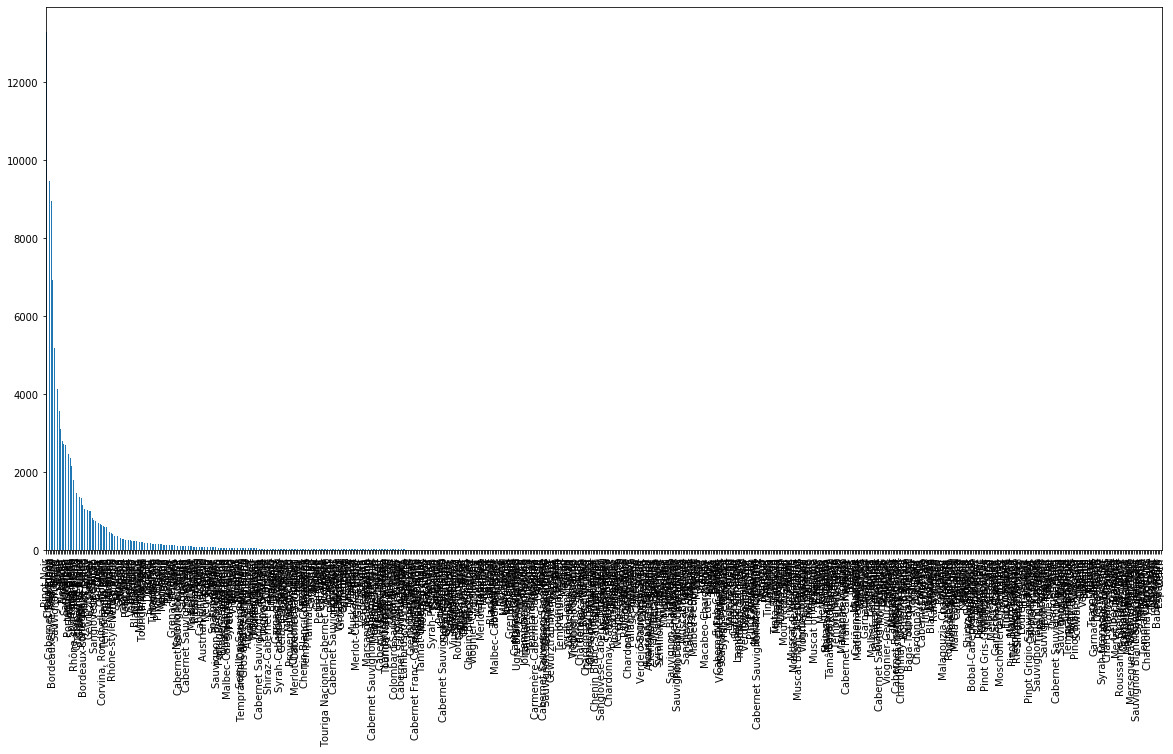

In [8]:
dataset['variety'].value_counts().plot(kind='bar', figsize=(20, 10))

In [9]:
keep_varieties = dataset['variety'].value_counts() >= dataset['variety'].value_counts().mean()
keep_varieties = keep_varieties[keep_varieties == True]
keep_varieties

Pinot Noir                  True
Chardonnay                  True
Cabernet Sauvignon          True
Red Blend                   True
Bordeaux-style Red Blend    True
                            ... 
Mourvèdre                   True
Primitivo                   True
Montepulciano               True
Zweigelt                    True
Touriga Nacional            True
Name: variety, Length: 62, dtype: bool

In [5]:
keep_varieties.to_csv('varieties_to_keep.csv')

/home/enrico/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [10]:
dataset = dataset[dataset['variety'].isin(keep_varieties.index)]

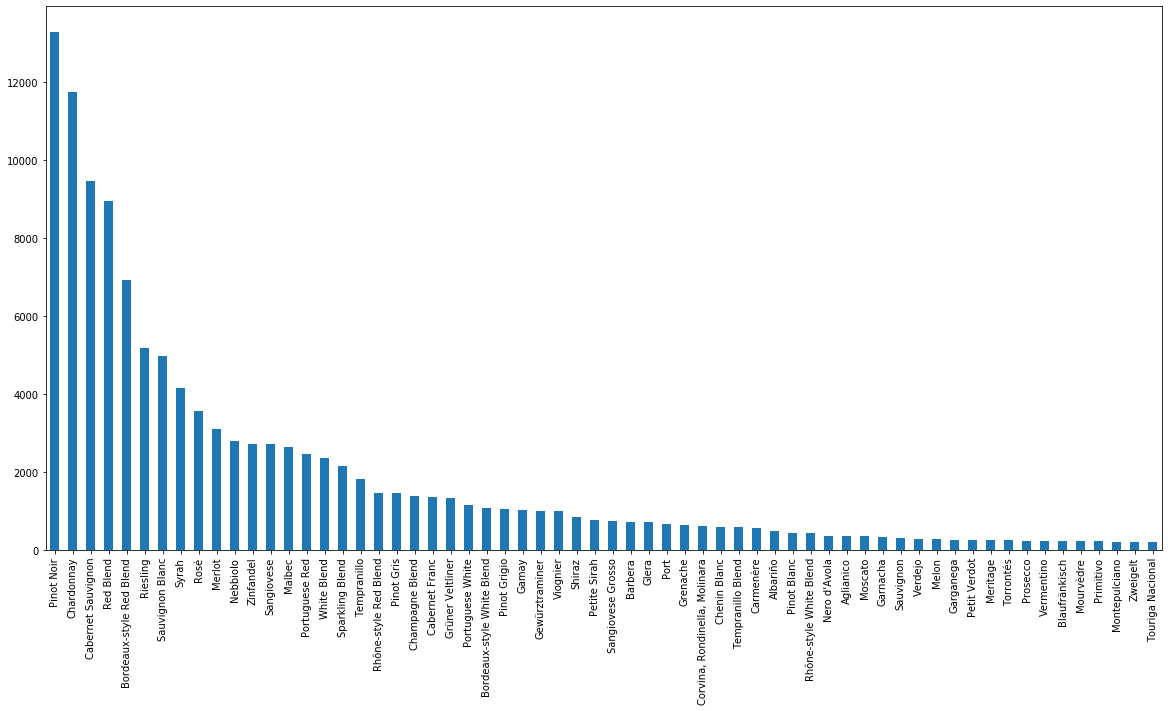

In [11]:
dataset['variety'].value_counts().plot(kind='bar', figsize=(20, 10))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(dataset['description'], dataset['variety'], random_state=0)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

c_pipeline = Pipeline([
    ('preprocessing', Pipeline([
        ('count_vectorization', CountVectorizer()),
        ('tfidf_transform', TfidfTransformer())
    ])),
    ('classifier', LinearSVC())
])

c_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessing', Pipeline(memory=None,
     steps=[('count_vectorization', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ng...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [25]:
print(f'TF-IDF vector shape: 
      {c_pipeline.named_steps["preprocessing"].named_steps["tfidf_transform"].idf_.shape}\n')
      
print(c_pipeline.named_steps['preprocessing'].named_steps['tfidf_transform'].idf_)

TF-IDF vector shape: (27049,)

[ 7.11487796 11.69984544 10.44708247 ... 11.69984544 11.69984544
 11.29438033]


In [19]:
y_pred = c_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

                               precision    recall  f1-score   support

                    Aglianico       0.77      0.54      0.63        91
                     Albariño       0.61      0.50      0.55       112
                      Barbera       0.79      0.60      0.68       180
                Blaufränkisch       0.73      0.46      0.57        71
     Bordeaux-style Red Blend       0.68      0.78      0.73      1735
   Bordeaux-style White Blend       0.72      0.53      0.61       297
               Cabernet Franc       0.64      0.40      0.49       353
           Cabernet Sauvignon       0.61      0.72      0.66      2399
                    Carmenère       0.63      0.49      0.55       137
              Champagne Blend       0.73      0.62      0.67       356
                   Chardonnay       0.72      0.87      0.79      2985
                 Chenin Blanc       0.70      0.49      0.57       146
Corvina, Rondinella, Molinara       0.75      0.70      0.72       164
     

In [20]:
from sklearn.externals import joblib

joblib.dump(c_pipeline, 'model.joblib')

['model.joblib']